In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from IPython.display import display
import warnings
import os 
# ignore warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.1f}'.format
%matplotlib inline
plotsize = (13, 5)

In [2]:
data = 'SampleSuperstore.xls'
Df = pd.read_excel(data)
Df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [3]:
variables = ['Order Date', 'Category', 'Sales']
group_variables = variables[:2]
outcome_variables = variables[2]
base = Df.groupby(group_variables)[outcome_variables].sum().reset_index()

In [4]:
print(f'Columns:{base.columns}\nIndex:{base.index}')

Columns:Index(['Order Date', 'Category', 'Sales'], dtype='object')
Index:RangeIndex(start=0, stop=2864, step=1)


In [5]:
base.head()

,Order Date,Category,Sales
0,2011-01-04,Office Supplies,16.4
1,2011-01-05,Office Supplies,288.1
2,2011-01-06,Office Supplies,19.5
3,2011-01-07,Furniture,"2,573.8"
4,2011-01-07,Office Supplies,685.3


In [6]:
base.dtypes#order default value type nanosecond

In [7]:
type(base['Order Date'])

pandas.core.series.Series

In [8]:
base['Order Date'].dtype

dtype('<M8[ns]')

In [9]:
for x in base.columns:
    print(f'{x} {type(base[x])} {base[x].dtype}')

Order Date <class 'pandas.core.series.Series'> datetime64[ns]
Category <class 'pandas.core.series.Series'> object
Sales <class 'pandas.core.series.Series'> float64


**Working with NumPy Arrays
It isn't always necessary to extract NumPy arrays, as the Pandas Series contains NumPy functionality. However, some applications use NumPy arrays as inputs and can bypass Pandas if desired.**

In [10]:
order_date = np.array(base['Order Date'])
category = np.array(base['Category'])
sales = np.array(base['Sales']).round(1)

In [11]:
print(f'Order Date:{type(order_date)}, {order_date.dtype}')
print(f'Category:{type(category)}, {category.dtype}')
print(f'Order Date:{type(sales)}, {sales.dtype}')

Order Date:<class 'numpy.ndarray'>, datetime64[ns]
Category:<class 'numpy.ndarray'>, object
Order Date:<class 'numpy.ndarray'>, float64


**If starting from the NumPy arrays, we could build the DataFrame (note dictionary input structure):**

In [12]:
DfDict = {'Order Date':order_date, 'Category':category, 'Sales':sales}
DfDict

{'Order Date': array(['2011-01-04T00:00:00.000000000', '2011-01-05T00:00:00.000000000',
        '2011-01-06T00:00:00.000000000', ...,
        '2014-12-31T00:00:00.000000000', '2014-12-31T00:00:00.000000000',
        '2014-12-31T00:00:00.000000000'], dtype='datetime64[ns]'),
 'Category': array(['Office Supplies', 'Office Supplies', 'Office Supplies', ...,
        'Furniture', 'Office Supplies', 'Technology'], dtype=object),
 'Sales': array([ 16.4, 288.1,  19.5, ..., 323.1, 299.7,  90.9])}

In [13]:
df_from_numpy = pd.DataFrame(DfDict)
df_from_numpy

,Order Date,Category,Sales
0,2011-01-04,Office Supplies,16.4
1,2011-01-05,Office Supplies,288.1
2,2011-01-06,Office Supplies,19.5
3,2011-01-07,Furniture,"2,573.8"
4,2011-01-07,Office Supplies,685.3
...,...,...,...
2859,2014-12-30,Office Supplies,282.4
2860,2014-12-30,Technology,302.4
2861,2014-12-31,Furniture,323.1
2862,2014-12-31,Office Supplies,299.7


In [14]:
df_from_numpy.dtypes

### datetime64 format in Numpy
The NumPy date array is a datetime64 object, with ns (nanosecond) units. We can leave it this way, or specify a unit:

While the Array and Pandas Series are basically the same, we see the Series has an index, and formats the date output somewhat.

In [15]:
order_date

In [16]:
orderdate_daily = np.array(order_date, dtype='datetime64[D]')

In [17]:
orderdate_daily

The order_date variable now has daily format, although this doesn't change much because we already had one observation per day. In practice, leaving nanosecond precision is usually fine.

However, if we aggregate to monthly:

In [18]:
order_date_montly = np.array(order_date, dtype='datetime64[M]')

In [19]:
order_date_montly

In [20]:
np.unique(order_date_montly)

In [21]:
len(np.unique(order_date_montly))

48

# Working with the Pandas DatetimeIndex 
Let's return to our Pandas DataFrame object:

In [22]:
print(base.head())
print('base category unique variables:')
print(f'{base["Category"].unique()}')

  Order Date         Category   Sales
0 2011-01-04  Office Supplies    16.4
1 2011-01-05  Office Supplies   288.1
2 2011-01-06  Office Supplies    19.5
3 2011-01-07        Furniture 2,573.8
4 2011-01-07  Office Supplies   685.3
base category unique variables:
['Office Supplies' 'Furniture' 'Technology']


## Setting Index Using Existing Variable
**We often want to set an Index explicitly, or manipulate an Index, for working with Time Series data. The Pandas DateTime Index is useful here, although it is often useful to standardize the  index by ensuring all relevant time periods are included only once. Our data violate this condition for two reasons:**
* * (1) Multiple values for a given period (due to multiple categories) and 
 * (2) Missing days (for daily data). We will fix both of these issues below, and explore some useful Datetime functionality.*

In [23]:
base.set_index('Order Date', inplace = True)
# Note that without inplace=True, it will output the results without changing the data

In [24]:
base.head()

,Category,Sales
Order Date,,
2011-01-04,Office Supplies,16.4
2011-01-05,Office Supplies,288.1
2011-01-06,Office Supplies,19.5
2011-01-07,Furniture,"2,573.8"
2011-01-07,Office Supplies,685.3


In [25]:
print(base.index)

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-07', '2011-01-07', '2011-01-08', '2011-01-08',
               '2011-01-10', '2011-01-10',
               ...
               '2014-12-28', '2014-12-29', '2014-12-29', '2014-12-29',
               '2014-12-30', '2014-12-30', '2014-12-30', '2014-12-31',
               '2014-12-31', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=2864, freq=None)


In [26]:
base['2012'].head()

,Category,Sales
Order Date,,
2012-01-02,Furniture,452.4
2012-01-02,Office Supplies,139.1
2012-01-02,Technology,"1,340.6"
2012-01-03,Furniture,"1,352.4"
2012-01-03,Office Supplies,17.4


In [27]:
print(base[base['Category']=='Office Supplies']['2011':'2012-02'].head())

                   Category  Sales
Order Date                        
2011-01-04  Office Supplies   16.4
2011-01-05  Office Supplies  288.1
2011-01-06  Office Supplies   19.5
2011-01-07  Office Supplies  685.3
2011-01-08  Office Supplies   10.4


## Datetime Components 
Pandas Datetime variables have a number of useful __[components](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components)__.  Using the DatetimeIndex, we can extract items like month, year, day of week, quarter, etc.:

In [28]:
#base.set_index('Order Date', inplace = True)
print(f'Day:{base.index.day}\nWeek:{base.index.week}')
base['DayOfWeek'] = base.index.dayofweek #Day Of Week: monday = 0, sunday = 6
print(base.head())
del(base['DayOfWeek'])
# Note: use dt method when the date variable is not part of the index: 
# df['Order Date'].dt.dayofweek.head()

Day:Int64Index([ 4,  5,  6,  7,  7,  7,  8,  8, 10, 10,
            ...
            28, 29, 29, 29, 30, 30, 30, 31, 31, 31],
           dtype='int64', name='Order Date', length=2864)
Week:Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
            ...
            52,  1,  1,  1,  1,  1,  1,  1,  1,  1],
           dtype='int64', name='Order Date', length=2864)
                   Category   Sales  DayOfWeek
Order Date                                    
2011-01-04  Office Supplies    16.4          1
2011-01-05  Office Supplies   288.1          2
2011-01-06  Office Supplies    19.5          3
2011-01-07        Furniture 2,573.8          4
2011-01-07  Office Supplies   685.3          4


# Standardizing the DatetimeIndex 
While data from existing variables may be sufficient, some Time Series applications require that data contain all periods and have a Frequency assigned. We can see above that our data do not have a frequency (freq=None). While the data seem daily, there are many types of possible [frequencies](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases) (business days, weekdays, etc.). If the input data are already standardized, Pandas will infer a Frequency and assign it. Otherwise, we need to ensure there are:
- No duplicate index values 
- No missing index values 

Setting a Frequency helps ensure the data are standardized and will work in applications, and is also required for functionality like resampling. 

## Pivoting Data:

Because there are multiple categories, we have multiple Time Series to analyze. As a result, our __DatetimeIndex__ does not uniquely identify an observation. To uniquely identify observations, we can either add categorical variables to the Index, or set a Pandas DateTimeIndex with separate columns for each series. There are several ways to accomplish this. The first appraoch uses Pandas' built-in __[pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)__ method:

### Pandas pivot method

In [29]:
base.index

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-07', '2011-01-07', '2011-01-08', '2011-01-08',
               '2011-01-10', '2011-01-10',
               ...
               '2014-12-28', '2014-12-29', '2014-12-29', '2014-12-29',
               '2014-12-30', '2014-12-30', '2014-12-30', '2014-12-31',
               '2014-12-31', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=2864, freq=None)

In [30]:
base.reset_index(inplace=True)
# Note if we didn't reset the index, we could use index=None below
base.index

RangeIndex(start=0, stop=2864, step=1)

In [31]:
sales_pivot = base.pivot(index='Order Date', columns='Category', values = 'Sales')
sales_pivot.head()

Category,Furniture,Office Supplies,Technology
Order Date,,,
2011-01-04,NaN,16.4,NaN
2011-01-05,NaN,288.1,NaN
2011-01-06,NaN,19.5,NaN
2011-01-07,"2,573.8",685.3,"1,147.9"
2011-01-08,76.7,10.4,NaN


Note that missing values (`NaN`) are often introduced here, and can be set to 0 easily using the `fillna(0)` method. 

### Unstacking:
To achieve the same result in Pandas, it is often easier to use the __Index__ and __[unstack](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html)__ / __[(stack)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html)__ methods. The __unstack__ method transforms long data into wide data by creating columns by category for levels of the index, while __stack__ does the reverse.

Here, we can tell Pandas that the `Date` and `Category` values are part of the __Index__ and use the `unstack` function to generate separate columns (this also removes the `Category` column from the Index):

In [32]:
sales  = base.set_index(['Order Date', 'Category']).unstack('Category').fillna(0)
#Note -- 2 levels of column names, the original variables are in columns.levels[0], 
# newly-created category variable names are in columns.levels[1]. This can be reset completely:
# sales.columns = sales.columns.levels[1].rename(None)
# Alternatively, keeping 'Sales' as a level 0 name allows us to refer to the variables jointly (sales['Sales'])
sales.head()

Sales 
 
 
 Category 
 Furniture 
 Office Supplies 
 Technology 
 
 
 Order Date 
 
 
 
 
 
 
 
 2011-01-04 
 0.0 
 16.4 
 0.0 
 
 
 2011-01-05 
 0.0 
 288.1 
 0.0 
 
 
 2011-01-06 
 0.0 
 19.5 
 0.0 
 
 
 2011-01-07 
 2,573.8 
 685.3 
 1,147.9 
 
 
 2011-01-08 
 76.7 
 10.4 
 0.0

In [33]:
"""sales.columns = sales.columns.levels[1].rename(None)
sales.head()"""

'sales.columns = sales.columns.levels[1].rename(None)\nsales.head()'

In [34]:
print(sales.index)
print(f'Unique dates in our data: {len(sales.index.unique())} Days')

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-14', '2011-01-15',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=1238, freq=None)
Unique dates in our data: 1238 Days


We can generate a complete index using Pandas' __[date_range](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html)__ function:

In [35]:
new_index = pd.date_range(sales.index.min(), sales.index.max())
print(new_index)

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-09', '2011-01-10', '2011-01-11',
               '2011-01-12', '2011-01-13',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', length=1458, freq='D')


To use this index, we need to tell Pandas how to treat missing values. In this case, we want to use zero for days without sales data. 

In [36]:
sales_new = sales.reindex(new_index, fill_value=0)
sales_new.index

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-09', '2011-01-10', '2011-01-11',
               '2011-01-12', '2011-01-13',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', length=1458, freq='D')

We can see the result now has a daily frequency. While some Time Seriods models will work without an explicit frequency, many will not. It is also helps to ensure we aren't missing important dates when summarizing and plotting the data. 


## Resampling 
We can now easily Resample our data at any desired frequency, using either the `asfreq` method or the `resample` method. The `asfreq` method assumes a default fill approach (which can be dangerous). The `resample` method allows this to be specified directly. which generates a __[resampler](https://pandas.pydata.org/pandas-docs/stable/reference/resampling.html)__ object. To get to values, we need to specify an aggregation function if upsampling (moving to a lower frequency), or fill function if downsampling (moving to a higher frequency). This typically the sum or mean for upsampling, or interpolate for downsampling. We generate results for some common frequencies below:
### Upsampling (Moving to a longer period)

In [37]:
sales_weekly = sales_new.resample('W').sum()
print(f'Weekly Sales: {sales_weekly.head()}\n')
sales_montly = sales_new.resample('M').sum()
print(f'Montly Sales: {sales_montly.head()}\n')
sales_quarterly = sales_new.resample('Q').sum()
print(f'Quarterly Sales: {sales_quarterly.head()}\n')
sales_annualy = sales_new.resample('Y').sum()
print(f'Annualy Sales:{sales_annualy}\n')

Weekly Sales:                Sales                           
Category   Furniture Office Supplies Technology
2011-01-09   2,650.5         1,019.8    1,147.9
2011-01-16   1,003.8         2,039.4      827.9
2011-01-23   1,747.3           871.1      824.1
2011-01-30     550.2           680.3      343.3
2011-02-06     290.7           502.7      649.9

Montly Sales:                Sales                           
Category   Furniture Office Supplies Technology
2011-01-31   5,951.9         4,851.1    3,143.3
2011-02-28   2,130.3         1,071.7    1,608.5
2011-03-31  14,574.0         8,605.9   32,511.2
2011-04-30   7,944.8        11,155.1    9,195.4
2011-05-31   6,912.8         7,135.6    9,599.9

Quarterly Sales:                Sales                           
Category   Furniture Office Supplies Technology
2011-03-31  22,656.1        14,528.7   37,263.0
2011-06-30  28,063.7        31,243.7   27,231.3
2011-09-30  41,957.9        53,924.0   47,751.4
2011-12-31  64,515.1        52,080.0   63

### Downsampling (moving to a shorter period)
Just as upsampling (moving to a larger period) requires an aggregation function, downsampling (moving from Annual to Monthly, for example) requires an option to fill in missing values. A common approach is the __[interpolate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.resample.Resampler.interpolate.html)__ method, which allows various types of interpolation (linear, spline, etc.). Other options (ffill forward fill, bfill backward fill) are also supported.

In [38]:
# Note that downsampling (from Annual to Monthly for example) produces missing values:
sales_monthly_from_annual = sales_annualy.resample('M')
#sales_monthly_from_annual.interpolate(method='linear').head()
sales_monthly_from_annual.interpolate(method='spline', order = 3).head()

Sales 
 
 
 Category 
 Furniture 
 Office Supplies 
 Technology 
 
 
 
 
 2011-12-31 
 157,192.9 
 151,776.4 
 175,278.2 
 
 
 2012-01-31 
 157,062.6 
 147,084.7 
 168,957.8 
 
 
 2012-02-29 
 157,200.9 
 143,355.5 
 164,096.2 
 
 
 2012-03-31 
 157,611.1 
 140,049.0 
 159,969.0 
 
 
 2012-04-30 
 158,251.0 
 137,493.3 
 156,975.1

In [39]:
sales_daily = sales.asfreq('D')
sales_businessday = sales.asfreq('B')
sales_hourly = sales.asfreq('h')
#This will generate missing values:
sales_hourly.head()

Sales 
 
 
 Category 
 Furniture 
 Office Supplies 
 Technology 
 
 
 Order Date 
 
 
 
 
 
 
 
 2011-01-04 00:00:00 
 0.0 
 16.4 
 0.0 
 
 
 2011-01-04 01:00:00 
 NaN 
 NaN 
 NaN 
 
 
 2011-01-04 02:00:00 
 NaN 
 NaN 
 NaN 
 
 
 2011-01-04 03:00:00 
 NaN 
 NaN 
 NaN 
 
 
 2011-01-04 04:00:00 
 NaN 
 NaN 
 NaN

## Variable Transformations
For Time Series models, we may want to use transformed variables (log, difference, growth rate, etc). The example below illustrates how we might generate these variables in Pandas, using the Monthly Sales dataset. 

### Stationarity Transformations
Concerns about Stationarity often lead to considering variable transformations. Some commonly-used transformation methods (Variable Differencing, Percentage Change, and Log) are implemented below. Because of Index has several levels here, these transformations can be done for each outcome variable with one line (the results could be joined together using the Pandas __[concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)__ method). 

In [40]:
#Variable First Difference
print(f'Montly Sales, First Difference\n{sales_montly.diff().head()}')

#Variable Percent Chance
print(f'Montly Sales, %Change\n{sales_montly.pct_change().head()}')

#Log Sales
print(f'\nlog(1+Montly Sales) \n{np.log(1 + sales_montly).head()}')

#Add % change to original data
sales_montly.join(sales_montly.pct_change().add_suffix('_%_Change')).head()

Montly Sales, First Difference
               Sales                           
Category   Furniture Office Supplies Technology
2011-01-31       NaN             NaN        NaN
2011-02-28  -3,821.5        -3,779.4   -1,534.8
2011-03-31  12,443.6         7,534.2   30,902.7
2011-04-30  -6,629.1         2,549.2  -23,315.7
2011-05-31  -1,032.1        -4,019.4      404.4
Montly Sales, %Change
               Sales                           
Category   Furniture Office Supplies Technology
2011-01-31       NaN             NaN        NaN
2011-02-28      -0.6            -0.8       -0.5
2011-03-31       5.8             7.0       19.2
2011-04-30      -0.5             0.3       -0.7
2011-05-31      -0.1            -0.4        0.0

log(1+Montly Sales) 
               Sales                           
Category   Furniture Office Supplies Technology
2011-01-31       8.7             8.5        8.1
2011-02-28       7.7             7.0        7.4
2011-03-31       9.6             9.1       10.4
2011-04-30   

Sales 
 Sales_%_Change 
 
 
 Category 
 Furniture 
 Office Supplies 
 Technology 
 Furniture_%_Change 
 Office Supplies_%_Change 
 Technology_%_Change 
 
 
 
 
 2011-01-31 
 5,951.9 
 4,851.1 
 3,143.3 
 NaN 
 NaN 
 NaN 
 
 
 2011-02-28 
 2,130.3 
 1,071.7 
 1,608.5 
 -0.6 
 -0.8 
 -0.5 
 
 
 2011-03-31 
 14,574.0 
 8,605.9 
 32,511.2 
 5.8 
 7.0 
 19.2 
 
 
 2011-04-30 
 7,944.8 
 11,155.1 
 9,195.4 
 -0.5 
 0.3 
 -0.7 
 
 
 2011-05-31 
 6,912.8 
 7,135.6 
 9,599.9 
 -0.1 
 -0.4 
 0.0

### Rolling Averages and Windows
Another approach to transforming data involves looking at rolling averages. We will discuss this further in the Smoothing lessons. Here we set up rolling calculations for Mean and Standard Deviation, with variable window size. We will plot these a bit later.

In [41]:
window_size = 7
rolling_window = sales_new.rolling(window_size)
print(f'Rolling Mean\n{rolling_window.mean().dropna().head()}')
print(f'\nRolling Std.Dev\n{rolling_window.std().dropna().head()}')
print(f'\nCumulative Sales\n{sales_new.cumsum().dropna().head()}')

Rolling Mean
               Sales                           
Category   Furniture Office Supplies Technology
2011-01-10     378.6           147.0      168.4
2011-01-11     386.1           145.1      168.4
2011-01-12     387.5           103.9      168.4
2011-01-13     387.5           101.1      168.4
2011-01-14     145.5           292.8       96.8

Rolling Std.Dev
               Sales                           
Category   Furniture Office Supplies Technology
2011-01-10     968.4           258.9      432.1
2011-01-11     965.2           260.1      432.1
2011-01-12     964.6           256.5      432.1
2011-01-13     964.6           257.6      432.1
2011-01-14     325.3           764.8      242.8

Cumulative Sales
               Sales                           
Category   Furniture Office Supplies Technology
2011-01-04       0.0            16.4        0.0
2011-01-05       0.0           304.5        0.0
2011-01-06       0.0           324.0        0.0
2011-01-07   2,573.8         1,009.4    

# Visualization
Here we explore methods for plotting Time Series Data. Most of these packages use __Matplotlib's [pyplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html)__ library, although it may not be called directly. This means it is possible to adjust plot features, like the title, using __pyplot__ commands.

## Pandas Built-in Plotting
Pandas DataFrames have a built-in __[plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)__ method which, by default, plots columns against the index:

In [46]:
PlotSize = (16,6)

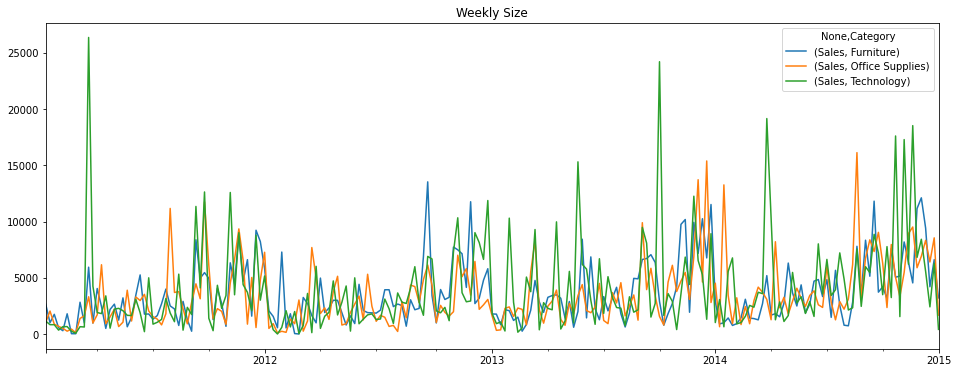

In [48]:
sales_quarterly.plot(figsize = PlotSize, title = 'Quarterly Size')
plt.show()
#Plot title Montly
sales_montly.plot(figsize = PlotSize, title = 'Montly Size')
plt.show()
#Plot title weekly
sales_weekly.plot(figsize = PlotSize, title = 'Weekly Size')
plt.show()

In [0]:
#rolling_window.mean().plot(figsize=plotsize, title='Daily Sales, 7-day Rolling Average')
rolling_window.std().plot(figsize=plotsize, title='Daily Sales Standard Deviation, 7-day Rolling Average')

# Monthly Sales Percent Change
sales_monthly.pct_change().plot(figsize=plotsize, title='Monthly Sales % Change')

# Cumulative Weekly Sales
sales_weekly.cumsum().plot(figsize=plotsize, title='Cumulative Weekly Sales')

# Quarterly Sales Growth
sales_quarterly.pct_change().plot(figsize=plotsize, title='Quarterly Sales % Change')

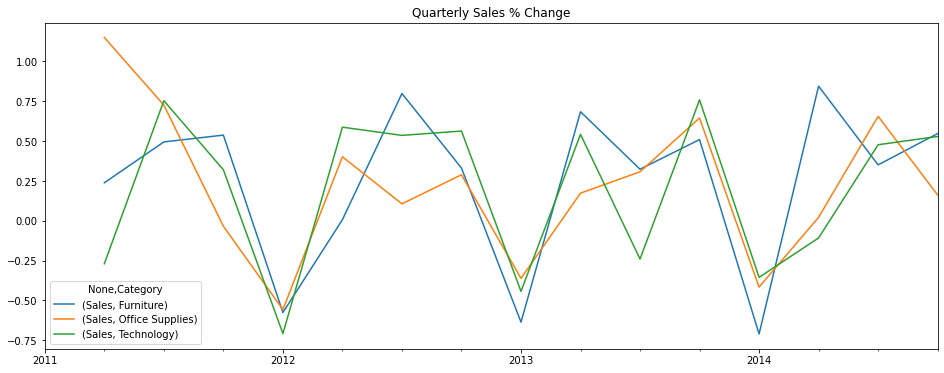

In [49]:
#rolling_window.mean().plot(figsize = PlotSize, title = 'Daily Sales 7-Day Rolling Averages
rolling_window.std().plot(figsize = PlotSize, title = 'Daily Sales Standart Deviation 7- Day Rolling Averages')
#Montly Sales percent(%) change 
sales_montly.pct_change().plot(figsize = PlotSize, title = 'Montly Sales % Change')
#Cumulative Sum weekly 
sales_weekly.cumsum().plot(figsize = PlotSize, title = 'Weekly Sales CumSum')
#Quarterly PCT Change 
sales_quarterly.pct_change().plot(figsize = PlotSize, title = 'Quarterly Sales % Change')
plt.show()

## Time Series Visualizations
There are a number of packages to help analyze Time Series data and create relevant plots. One example is __[statsmodels](https://www.statsmodels.org/stable/graphics.html#time-series-plots)__, which includes a number of methods for plotting Time Series-specific visualizations:
- __[plot_acf](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html#statsmodels.graphics.tsaplots.plot_acf)__: Plot of the Autocorrelation Function
- __[plot_pacf](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html#statsmodels.graphics.tsaplots.plot_pacf)__: Plot of the Partial Autocorrelation Function
- __[month_plot](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.month_plot.html#statsmodels.graphics.tsaplots.month_plot)__: Seasonal Plot for Monthly Data
- __[quarter_plot](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.quarter_plot.html#statsmodels.graphics.tsaplots.quarter_plot)__: Seasonal Plot for Quarterly Data

Some examples are illustrated below:


Daily Data Autocorrelation plots


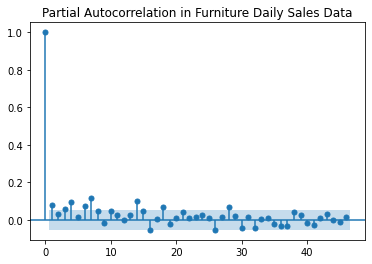

In [64]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot
print('\nDaily Data Autocorrelation plots')
# Autocorrelation and Partial Autocorrelation Functions for Daily Data
arr1 = sales_new['Sales']['Furniture']
acf_plot = plot_acf(arr1, lags=46,  title = 'Autocorrelation in Furniture Daily Sales Data')
pacf_plot = plot_pacf(arr1, lags = 46, title = 'Partial Autocorrelation in Furniture Daily Sales Data')


 Weekly Auto Correlation Plo0ts


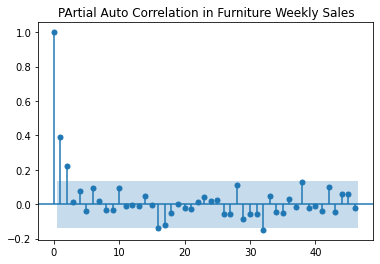

In [66]:
print('\n Weekly Auto Correlation Plo0ts')
arr2 = sales_weekly['Sales']['Furniture']

acf_plot2 = plot_acf(arr2, lags = 46, title = 'Auto Correlation in Furniture Weekly Sales')
pacf_plot2 = plot_pacf(arr2, lags = 46, title = 'PArtial Auto Correlation in Furniture Weekly Sales')


 Montly Data Seasonal Plots


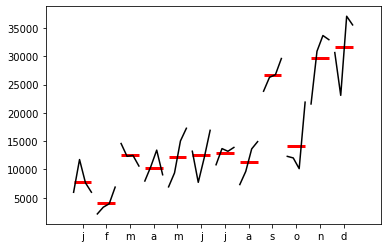

In [71]:
print('\n Montly Data Seasonal Plots')
m_plot = month_plot(sales_montly['Sales']['Furniture'])

Quarterly Data Seasonal Plots


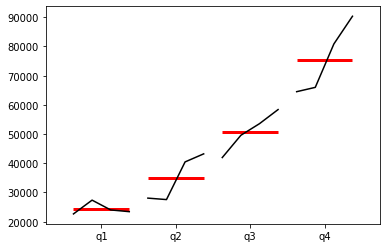

In [72]:
print('Quarterly Data Seasonal Plots')
q_plot = quarter_plot(sales_quarterly['Sales']['Furniture'])

# Exercises
## Exercise 1:
Using the source data, set up Monthly data for Sales and Profit by Segment by either (1) Resampling or (2) Grouping data by Year and Month.

In [73]:
Df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,262.0,2,0.0,41.9
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9,3,0.0,219.6
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6,2,0.0,6.9
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.6,5,0.5,-383.0
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.4,2,0.2,2.5


In [76]:
MyVariables = ['Order Date','Segment', 'Sales', 'Profit']
NewDf = Df[MyVariables].set_index('Order Date')
prof_pivot = NewDf.pivot_table(columns = 'Segment', index = 'Order Date')
Prof_Monthly = prof_pivot.resample('M').sum()
Prof_Monthly.head()

Profit 
 Sales 
 
 
 Segment 
 Consumer 
 Corporate 
 Home Office 
 Consumer 
 Corporate 
 Home Office 
 
 
 Order Date 
 
 
 
 
 
 
 
 
 
 
 2011-01-31 
 106.5 
 5.9 
 185.0 
 1,304.1 
 568.0 
 855.9 
 
 
 2011-02-28 
 228.3 
 126.0 
 37.9 
 1,442.7 
 464.1 
 104.1 
 
 
 2011-03-31 
 -26.5 
 131.3 
 73.7 
 3,777.8 
 1,988.4 
 4,439.9 
 
 
 2011-04-30 
 336.9 
 435.6 
 527.9 
 3,752.8 
 3,951.2 
 2,031.6 
 
 
 2011-05-31 
 484.0 
 873.0 
 -63.3 
 5,373.2 
 4,077.7 
 696.1

## Exercise 2:
Analyze the results from the first exercise to determine whether Autocorrelation or Seasonal patterns differ by Segment or whether we are looking at Sales or Profits.

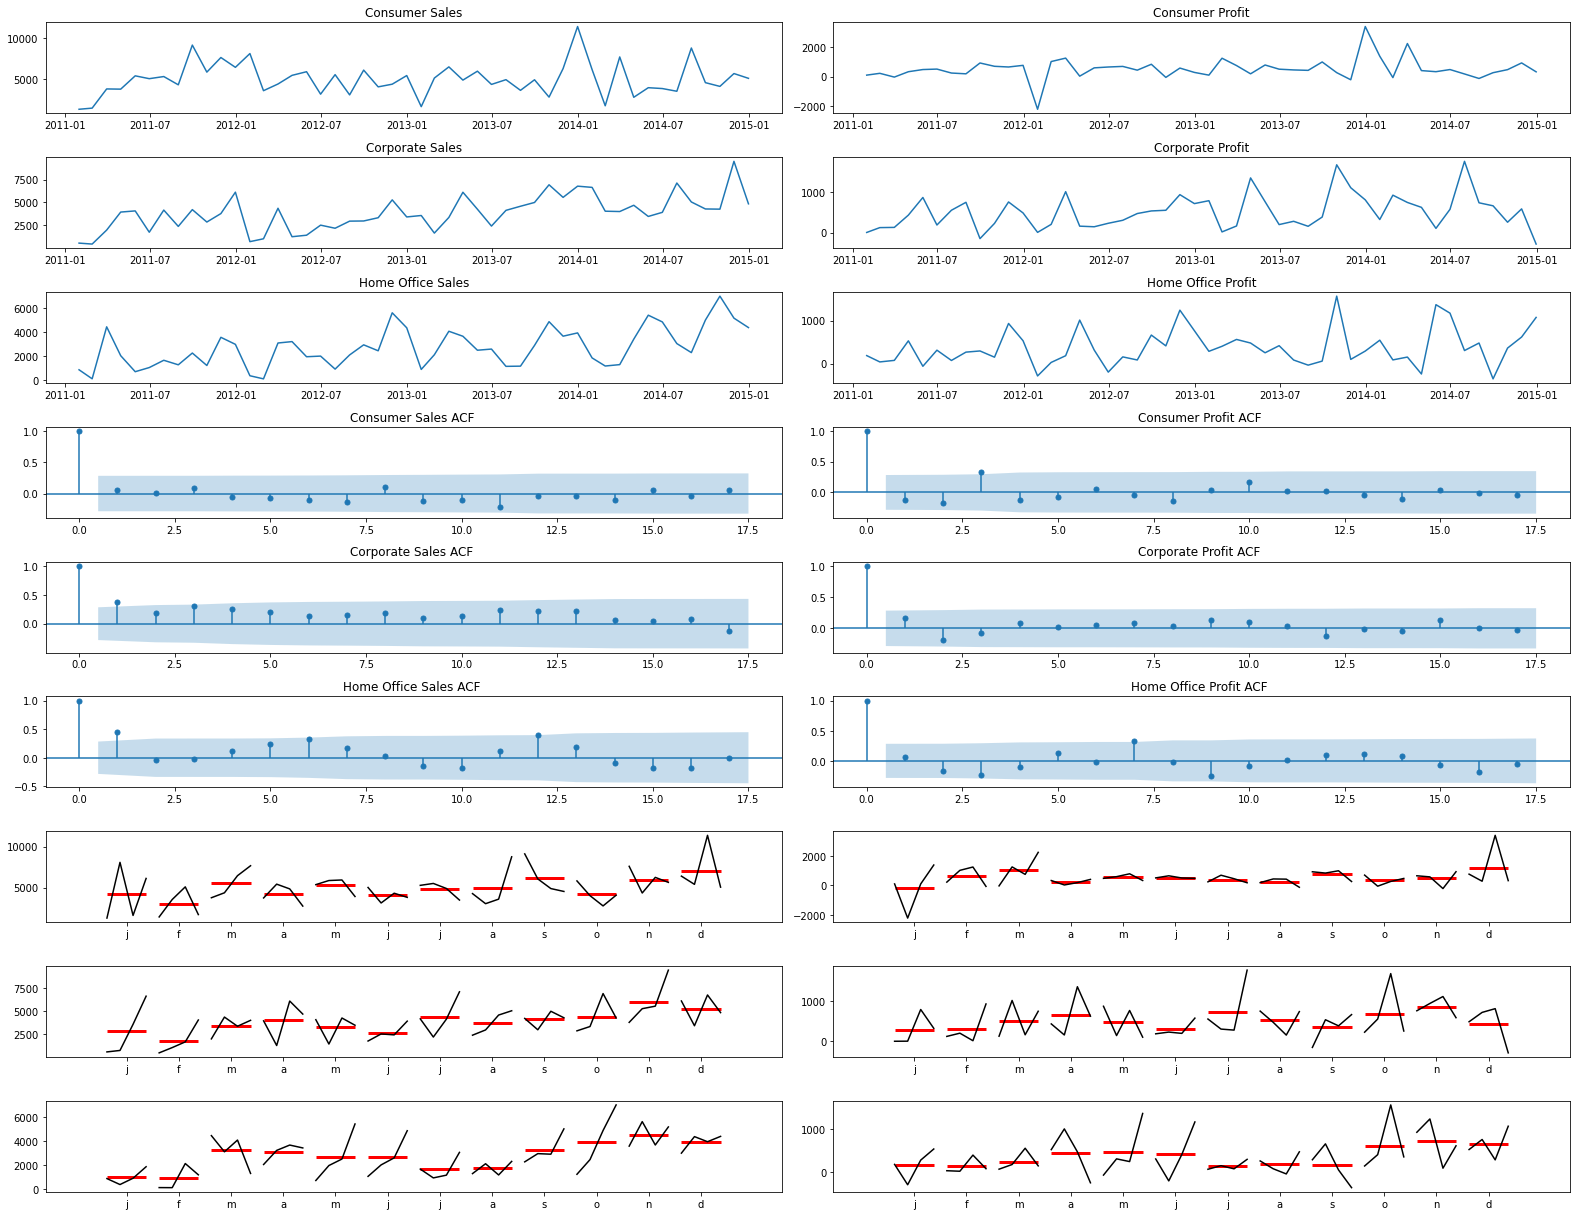

In [85]:
fig, axes = plt.subplots(9, 2, figsize = (22,17),)
for i, cat in enumerate(['Consumer', 'Corporate', 'Home Office']):
    for j, money in enumerate(['Sales', 'Profit']):
        axes[i,j].plot(Prof_Monthly[money, cat])
        axes[i,j].title.set_text(cat + " " + money)
        plot_acf(Prof_Monthly[money, cat], ax = axes[i+3, j], title = cat + " " + money + " ACF ")
        month_plot(Prof_Monthly[money, cat], ax = axes[i+6, j])

fig.tight_layout()
plt.show()

Seasonal patterns across groups are pretty similar and there is very little autocorrelation.

## Exercise 3:
Use the result from Exercise 2 to develop an EDA function to explore other variables (like Region or Sub-Category) that may be of interest.

In [110]:
cat_var = 'Region'
date_var = 'Order Date'
money_vars = ['Profit', 'Sales']


def Monthly_EDA(cat_var = cat_var,
              date_var = date_var,
              money_vars = money_vars):
    new_vars = [cat_var, date_var] + money_vars
    cats = list(Df[cat_var].unique()) 
    num_cats = len(cats)
    new_base  = Df[new_vars].set_index(date_var)
    prof_pivot = new_base.pivot_table(columns = cat_var, index=date_var)
    porf_month = prof_pivot.resample('M').sum()
    porf_month.head()

    fig, axes = plt.subplots(num_cats*3, 2, figsize = (20, 5*num_cats),)
    for i, cat in enumerate(cats):
        for j, money in enumerate(money_vars):
            axes[i,j].plot(porf_month[money, cat])
            axes[i,j].title.set_text(cat + " " + money)
            fig = plot_acf(porf_month[money, cat], ax = axes[i+num_cats, j], title = cat + " " + money + "ACF" )
            fig = month_plot(porf_month[money, cat], ax = axes[i+num_cats*2, j])
            axes[i+num_cats*2, j].title.set_text(cat + 'Seasonality')

    fig.tight_layout()
    plt.show()

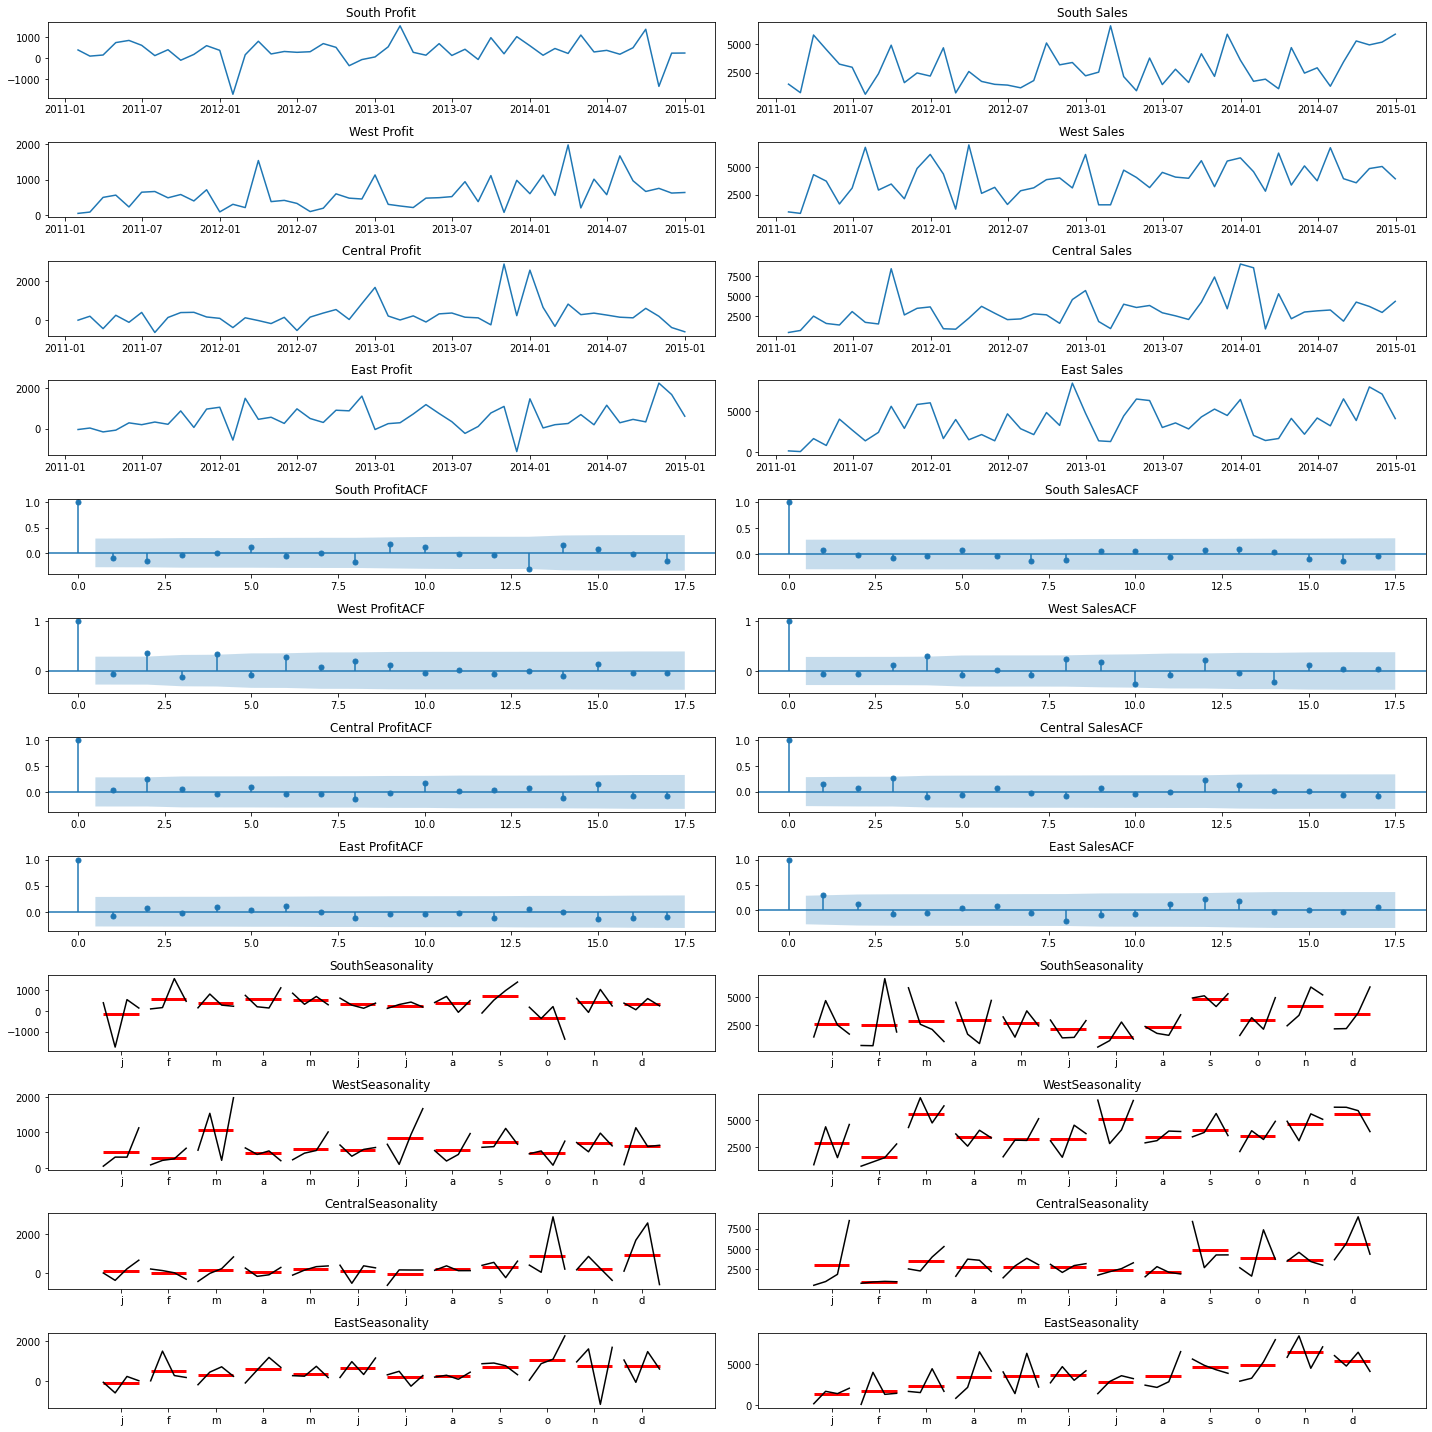

In [111]:
Monthly_EDA(cat_var='Region')

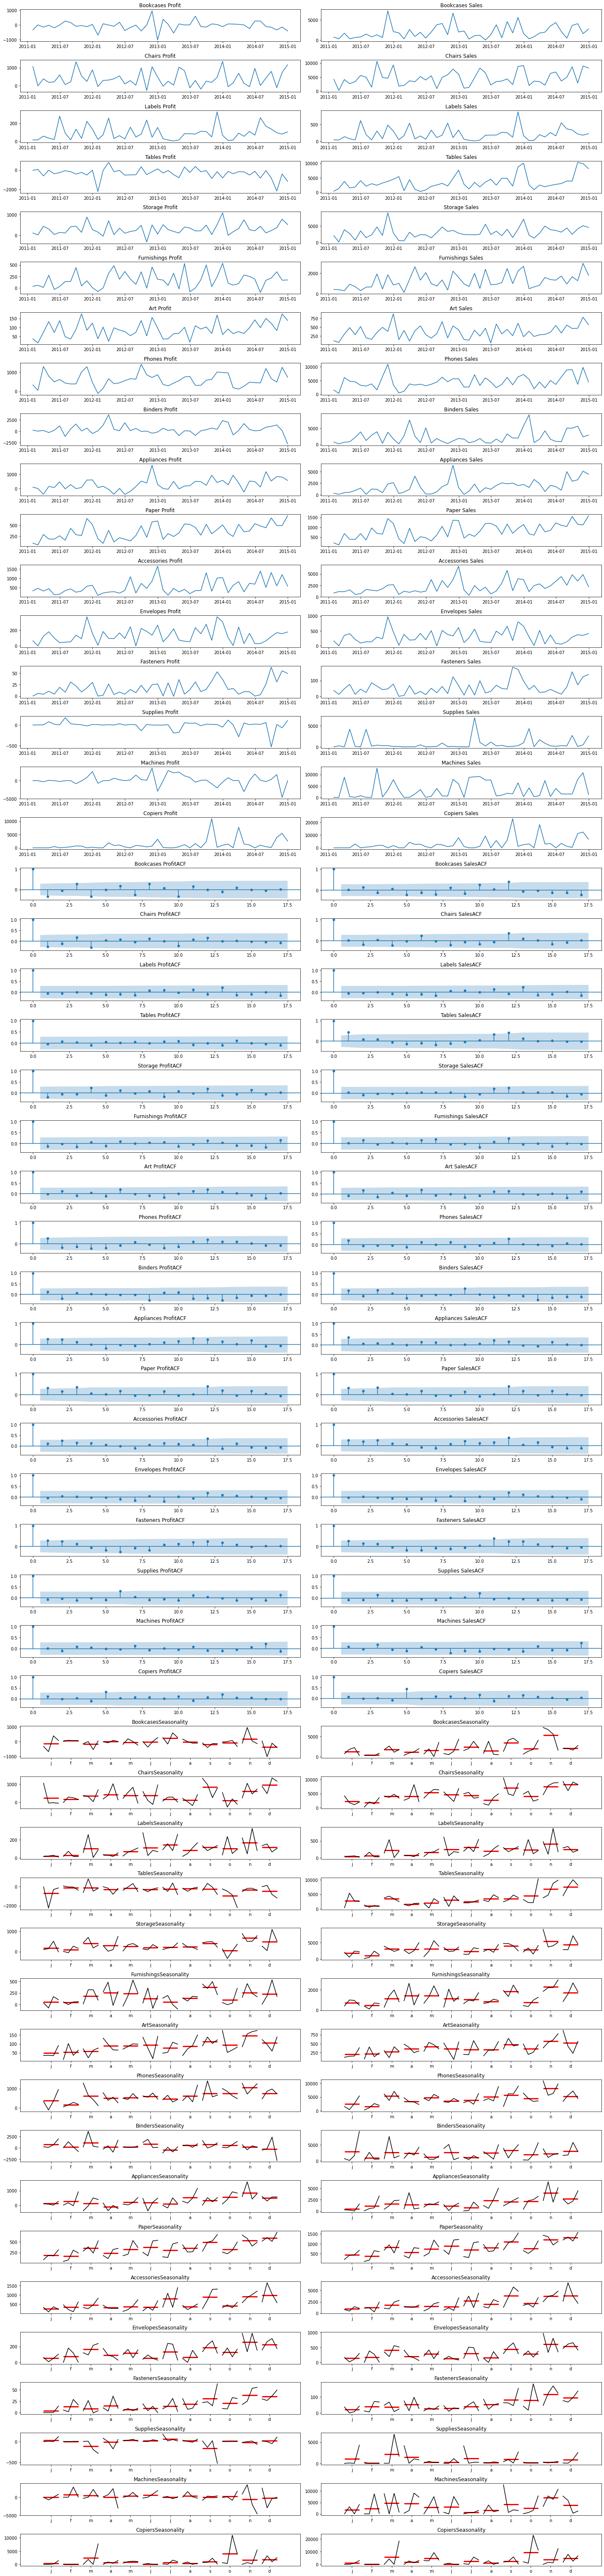

In [113]:
Monthly_EDA(cat_var = 'Sub-Category')